<a href="https://colab.research.google.com/github/lagutinsy/lab01_ml_pipeline/blob/main/Lab1_part2_ml_pipeline_LG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [26]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [29]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,147,91,40,76,171,67,7,149,44,19,135,169,332,144,68,4,17,192,200
1,244,85,47,75,121,53,9,157,44,20,165,168,358,176,77,1,7,182,191
2,689,105,51,105,197,60,11,191,35,22,162,207,545,194,64,18,4,196,205
3,555,87,49,86,190,64,9,177,37,21,153,197,471,209,67,11,7,192,199
4,215,90,39,86,169,62,7,162,41,20,131,194,388,147,74,1,22,185,191
5,536,102,55,101,213,67,12,222,30,25,177,226,719,213,71,2,21,187,199
6,560,105,55,96,181,56,9,219,30,25,175,231,713,216,74,4,5,187,194
7,509,101,55,105,182,59,10,215,31,24,177,221,678,223,74,12,26,186,195
8,431,99,47,91,226,74,5,202,32,23,148,234,629,186,79,4,11,192,191
9,747,80,43,68,123,53,7,150,46,19,147,169,327,176,81,7,14,179,184


Methods `describe` and `info` deliver some useful information.

In [30]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,427.553734,94.207650,45.236794,82.812386,169.642987,61.511840,8.408015,170.373406,40.566485,20.706740,149.047359,189.617486,448.285974,176.309654,72.116576,6.320583,12.599271,189.202186,195.897996
std,246.048226,8.185612,6.150369,15.991996,32.321380,6.585648,3.318991,33.786212,7.825285,2.646367,14.310604,31.402255,180.609128,32.460233,6.829057,4.864886,8.867418,6.168935,7.499670
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,213.000000,88.000000,40.000000,70.000000,143.000000,57.000000,7.000000,147.000000,33.000000,19.000000,139.000000,167.000000,320.000000,152.000000,67.000000,2.000000,6.000000,185.000000,191.000000
50%,422.000000,93.000000,45.000000,80.000000,169.000000,62.000000,8.000000,157.000000,43.000000,20.000000,147.000000,179.000000,367.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,649.000000,100.000000,50.000000,98.000000,196.000000,65.000000,10.000000,202.000000,46.000000,23.000000,161.000000,217.000000,612.000000,199.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,306.000000,126.000000,49.000000,265.000000,61.000000,29.000000,188.000000,288.000000,1018.000000,268.000000,118.000000,22.000000,40.000000,204.000000,211.000000


In [31]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [32]:
from sklearn import preprocessing
data_pd = pd.DataFrame(data)
data_pd.isnull().any()


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
dtype: bool

In [33]:
scaler_minmax_p_1 = preprocessing.MinMaxScaler()
scaler_minmax_p_1.fit(X_train)
scaler_standart_p_1 = preprocessing.StandardScaler()
scaler_standart_p_1.fit(X_train)


StandardScaler()

In [34]:
X_train_scaled_minmax = scaler_minmax_p_1.transform(X_train)
X_train_scaled_standart = scaler_standart_p_1.transform(X_train)
X_test_scaled_minmax = scaler_minmax_p_1.transform(X_test)
X_test_scaled_standart = scaler_standart_p_1.transform(X_test)
X_test[0]

array([841,  93,  39,  87, 183,  64,   8, 169,  40,  20, 134, 200, 422,
       149,  72,   7,  25, 188, 195])

In [35]:
X_test_scaled_standart[0]

array([ 1.68187893, -0.14766784, -1.01497685,  0.26209567,  0.41363316,
        0.37816015, -0.12304543, -0.04068697, -0.07245758, -0.26730386,
       -1.05244212,  0.33093109, -0.14567341, -0.84209378, -0.01708609,
        0.13978473,  1.39973537, -0.19505508, -0.11984732])

Разброс большой , необходимо поработать с данными диапазонами.

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [36]:
### YOUR CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV
!pip install scikit-plot
import scikitplot as skplt


log_reg_2_1 =  linear_model.LogisticRegressionCV(multi_class='multinomial', solver='saga', tol=1e-3,max_iter=500)

In [37]:
space = {'cv': [i for i in range(10,21,1)],
             'penalty':['none', 'l1', 'l2', 'elasticnet']}

search = RandomizedSearchCV(log_reg_2_1, space, n_iter=500, scoring='accuracy', n_jobs=-1,  random_state=1)
result = search.fit(X_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 44 is smaller than n_iter=500. Running 44 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
110 fits failed out of a total of 220.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logisti

Best Score: 0.7030358632193494
Best Hyperparameters: {'penalty': 'l2', 'cv': 16}


In [38]:
log_reg_params =  linear_model.LogisticRegressionCV(cv=13,penalty='l2',
                                                    multi_class='multinomial', solver='saga', tol=1e-3,max_iter=500)
log_reg_params.fit(X_train, y_train)
y_pred_plot = log_reg_params.predict_proba(X_test)
y_pred = log_reg_params.predict(X_test)

from sklearn import metrics as skl_metrics

def f1(y_test, y_pred):
    f1 = skl_metrics.f1_score(y_test, y_pred,average='weighted')
    return f1

def accuracy(y_test, y_pred):
    accuracy = skl_metrics.accuracy_score(y_test, y_pred)
    return accuracy


print('f1_score', f1(y_test, y_pred))
print('accuracy', accuracy(y_test, y_pred))

f1_score 0.6732173900348633
accuracy 0.696969696969697


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

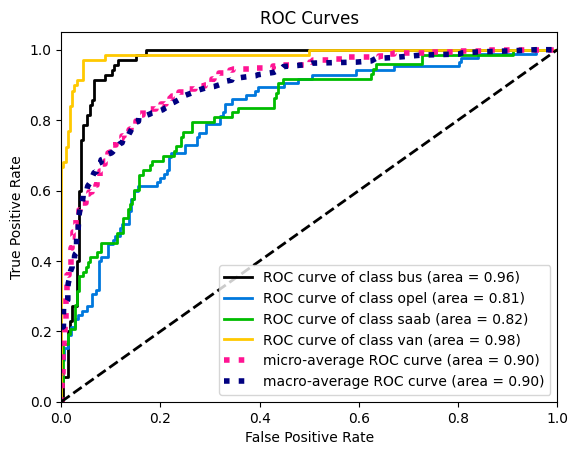

In [39]:
from scikitplot import metrics as scikit_metrics

def roc_curve(y_test, y_pred):
    roc_curve = scikit_metrics.plot_roc(y_test, y_pred)
    return roc_curve

roc_curve(y_test, y_pred_plot)

график 1

In [40]:
log_reg_2_1_scaled=  linear_model.LogisticRegressionCV(multi_class='multinomial', solver='saga', tol=1e-3,max_iter=500)
space = {'cv': [i for i in range(10,21,1)],
             'penalty':['none', 'l1', 'l2', 'elasticnet']}

search = RandomizedSearchCV(log_reg_2_1_scaled, space, n_iter=500, scoring='accuracy', n_jobs=-1,  random_state=1)
result = search.fit(X_train_scaled_standart, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 44 is smaller than n_iter=500. Running 44 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
110 fits failed out of a total of 220.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logisti

Best Score: 0.814161801501251
Best Hyperparameters: {'penalty': 'l1', 'cv': 17}


f1_score 0.7862285285668806
accuracy 0.7878787878787878


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

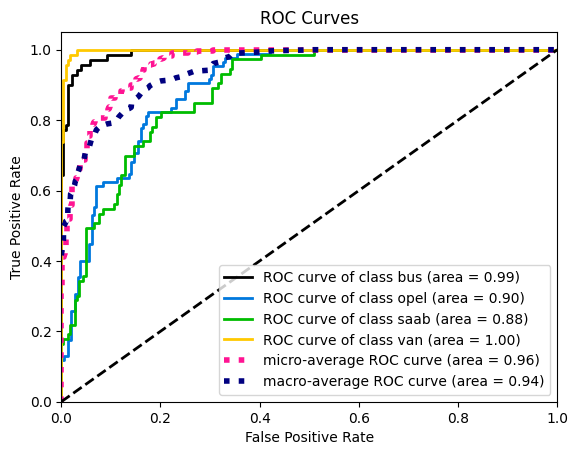

In [41]:
log_reg_2_1_scaled_par=  linear_model.LogisticRegressionCV(cv=15,penalty='l2',
                                    multi_class='multinomial', solver='saga', tol=1e-3,max_iter=500)
log_reg_2_1_scaled_par.fit(X_train_scaled_standart, y_train)
y_pred_plot = log_reg_2_1_scaled_par.predict_proba(X_test_scaled_standart)
y_pred = log_reg_2_1_scaled_par.predict(X_test_scaled_standart)
print('f1_score', f1(y_test, y_pred))
print('accuracy', accuracy(y_test, y_pred))
roc_curve(y_test, y_pred_plot)

график 2

In [43]:
log_reg_2_1_scaled_mm=  linear_model.LogisticRegressionCV(multi_class='multinomial', solver='saga', tol=1e-3,max_iter=500)
space = {'cv': [i for i in range(10,21,1)],
             'penalty':['none', 'l1', 'l2', 'elasticnet']}

search = RandomizedSearchCV(log_reg_2_1_scaled_mm, space, n_iter=500, scoring='accuracy', n_jobs=-1,  random_state=1)
result = search.fit(X_train_scaled_minmax, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 44 is smaller than n_iter=500. Running 44 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
110 fits failed out of a total of 220.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logisti

Best Score: 0.8104920767306089
Best Hyperparameters: {'penalty': 'l2', 'cv': 11}


f1_score 0.7894882056431765
accuracy 0.7912457912457912


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

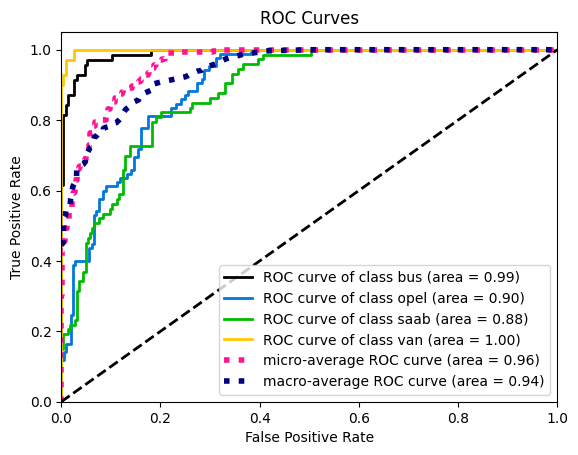

In [44]:
log_reg_2_1_scaled_par_mm=  linear_model.LogisticRegressionCV(cv=12,penalty='l2',
                                    multi_class='multinomial', solver='saga', tol=1e-3,max_iter=500)
log_reg_2_1_scaled_par_mm.fit(X_train_scaled_minmax, y_train)
y_pred_plot = log_reg_2_1_scaled_par_mm.predict_proba(X_test_scaled_minmax)
y_pred = log_reg_2_1_scaled_par_mm.predict(X_test_scaled_minmax)

print('f1_score', f1(y_test, y_pred))
print('accuracy', accuracy(y_test, y_pred))
roc_curve(y_test, y_pred_plot)

график 3

При отнормированных (качественных) данных информация лучше (точнее)
03 +  21-
параметры модели отличаются

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

In [45]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#неотнормир данные

Text(0, 0.5, 'cumulative explained variance')

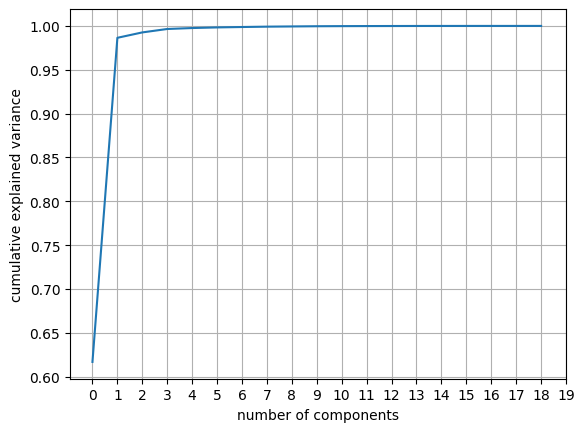

In [46]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks([i for i in range(0, 20)])
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

график

In [48]:
pca.explained_variance_ratio_

array([6.16800519e-01, 3.69646874e-01, 6.15352849e-03, 3.90018942e-03,
       1.08514206e-03, 7.11485483e-04, 4.54326041e-04, 4.07191912e-04,
       2.51755582e-04, 2.36495507e-04, 1.22470834e-04, 7.60246613e-05,
       5.61532131e-05, 4.73147353e-05, 2.46333002e-05, 1.56736443e-05,
       7.10578795e-06, 2.36025592e-06, 7.55904655e-07])

отнорм данные SS

Text(0, 0.5, 'cumulative explained variance')

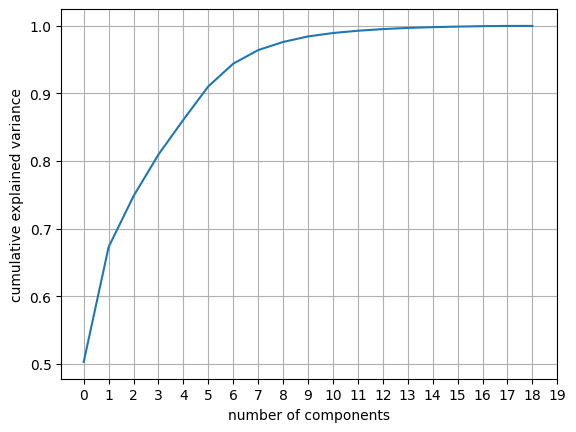

In [49]:
pca = PCA().fit(X_train_scaled_standart)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks([i for i in range(0, 20)])
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

grafik2

In [50]:
pca.explained_variance_ratio_

array([5.02695658e-01, 1.70098948e-01, 7.54025821e-02, 6.14859874e-02,
       5.15503708e-02, 4.93320729e-02, 3.35812706e-02, 2.01158832e-02,
       1.20025573e-02, 8.17259874e-03, 5.06936289e-03, 3.35638389e-03,
       2.43866392e-03, 1.72965998e-03, 1.13509565e-03, 8.18685768e-04,
       6.86947394e-04, 3.09667304e-04, 1.76047295e-05])

отнормированные MMS

Text(0, 0.5, 'cumulative explained variance')

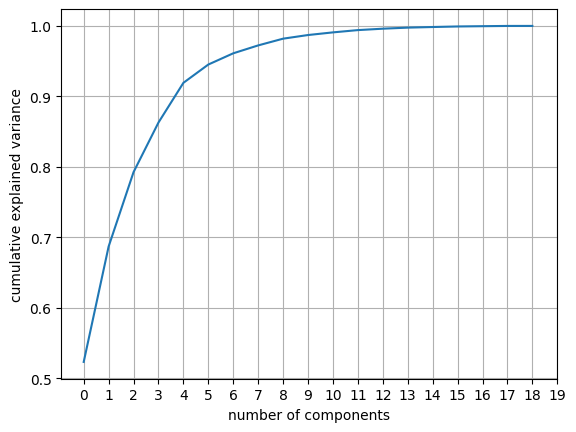

In [51]:
pca = PCA().fit(X_train_scaled_minmax)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks([i for i in range(0, 20)])
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

график

In [52]:
pca.explained_variance_ratio_

array([5.23287627e-01, 1.63791593e-01, 1.05533820e-01, 7.03589722e-02,
       5.63024416e-02, 2.59523211e-02, 1.59247181e-02, 1.12075842e-02,
       9.56173701e-03, 5.15767405e-03, 3.75862753e-03, 3.23613318e-03,
       1.99439078e-03, 1.51091212e-03, 8.64958601e-04, 7.82416759e-04,
       4.04405087e-04, 3.49597701e-04, 2.00703476e-05])

для неотнормированных данных достаточно до 7 компонентов для работы модели, а для отнормированной необходимо в 2 раза больше.
вес имеют 1 и 2 компоненты.

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [53]:
### YOUR CODE HERE
n_components = 6
pca_not_scaled = PCA(n_components=n_components)


X_train_PCA2 = pca_not_scaled.fit_transform(X_train)
X_test_PCA2 = pca_not_scaled.transform(X_test)
X_train_PCA2.shape

(549, 6)

In [54]:
n_components_scld = 14
pca_scaled_std = PCA(n_components=n_components_scld)

X_train_PCA2_std = pca_scaled_std.fit_transform(X_train_scaled_standart)
X_test_PCA2_std = pca_scaled_std.transform(X_test_scaled_standart)
pca_scaled_mm = PCA(n_components=n_components_scld)

X_train_PCA2_mm = pca_scaled_mm.fit_transform(X_train_scaled_minmax)
X_test_PCA2_mm = pca_scaled_mm.transform(X_test_scaled_minmax)
X_test_PCA2_mm.shape

(297, 14)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [55]:
### YOUR CODE HERE
log_reg_2_4 =  linear_model.LogisticRegressionCV( multi_class='multinomial', solver='saga', tol=1e-3,max_iter=500)

cv = np.arange(10, 20, 1)
penalty = ['none', 'l1', 'l2', 'elasticnet']

params_2_4 = dict(
                 log_reg__cv=cv,
                 log_reg__penalty=penalty)

pipe_2_4 = Pipeline(steps=[
                           ('log_reg', log_reg_2_4)])

searcher_2_4 = GridSearchCV(pipe_2_4, params_2_4)
searcher_2_4.fit(X_train_PCA2, y_train)
print('Best Penalty:', searcher_2_4.best_estimator_.get_params()['log_reg__penalty'])
print(searcher_2_4.best_estimator_.get_params()['log_reg'])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1760, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/di

Best Penalty: l2
LogisticRegressionCV(cv=16, max_iter=500, multi_class='multinomial',
                     solver='saga', tol=0.001)


f1_score 0.518614302690086
accuracy 0.5589225589225589


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

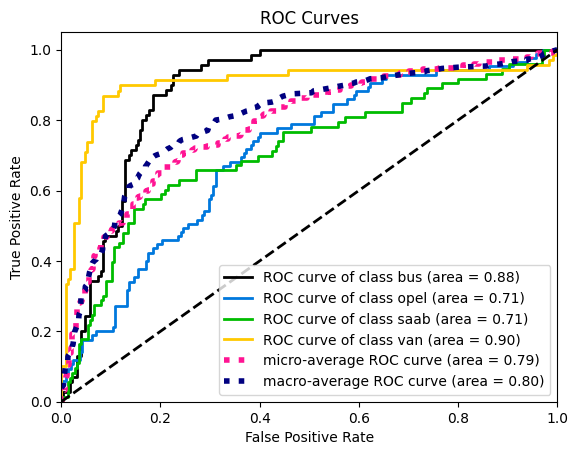

In [56]:
log_reg_2_4_par =  linear_model.LogisticRegressionCV(cv=18, penalty='l2',
                                                 multi_class='multinomial', solver='saga', tol=1e-3,max_iter=500)
log_reg_2_4_par.fit(X_train_PCA2, y_train)
y_pred_plot = log_reg_2_4_par.predict_proba(X_test_PCA2)
y_pred = log_reg_2_4_par.predict(X_test_PCA2)
print('f1_score', f1(y_test, y_pred))
print('accuracy', accuracy(y_test, y_pred))
roc_curve(y_test, y_pred_plot)

график

In [57]:
log_reg_2_4 =  linear_model.LogisticRegressionCV( multi_class='multinomial', solver='saga', tol=1e-3,max_iter=500)

searcher_2_4 = GridSearchCV(pipe_2_4, params_2_4)
searcher_2_4.fit(X_train_PCA2_std, y_train)

print(searcher_2_4.best_estimator_.get_params()['log_reg'])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1760, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/di

LogisticRegressionCV(cv=12, max_iter=500, multi_class='multinomial',
                     penalty='l1', solver='saga', tol=0.001)


f1_score 0.7539088155280703
accuracy 0.7575757575757576


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

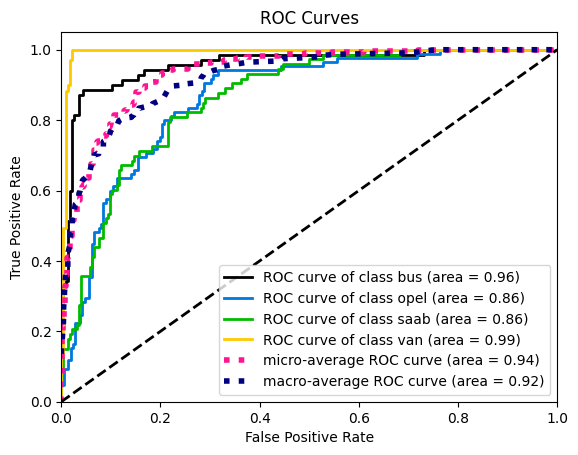

In [58]:
log_reg_2_4_scaled =  linear_model.LogisticRegressionCV( cv=11, penalty='l1',
                                                        multi_class='multinomial', solver='saga', tol=1e-3,max_iter=500)
log_reg_2_4_scaled.fit(X_train_PCA2_std, y_train)
y_pred_plot = log_reg_2_4_scaled.predict_proba(X_test_PCA2_std)
y_pred = log_reg_2_4_scaled.predict(X_test_PCA2_std)

print('f1_score', f1(y_test, y_pred))
print('accuracy', accuracy(y_test, y_pred))
roc_curve(y_test, y_pred_plot)

график

In [59]:
log_reg_2_4 =  linear_model.LogisticRegressionCV( multi_class='multinomial', solver='saga', tol=1e-3,max_iter=500)
searcher_2_4_2 = GridSearchCV(pipe_2_4, params_2_4)
searcher_2_4_2.fit(X_train_PCA2_mm, y_train)

print(searcher_2_4_2.best_estimator_.get_params()['log_reg'])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1760, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/di

LogisticRegressionCV(cv=13, max_iter=500, multi_class='multinomial',
                     penalty='l1', solver='saga', tol=0.001)


f1_score 0.7365607742636997
accuracy 0.7407407407407407


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

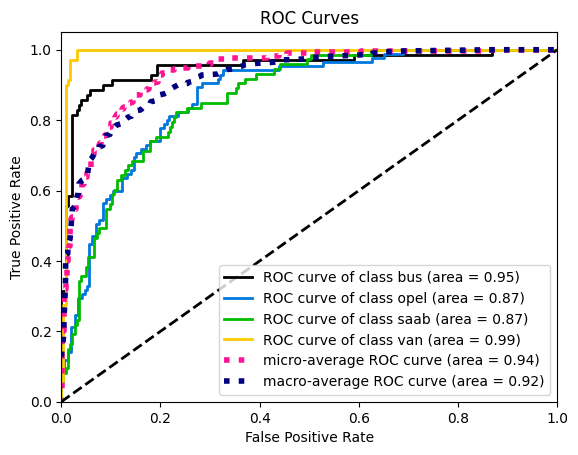

In [60]:
log_reg_2_4_scaled =  linear_model.LogisticRegressionCV( cv=10, penalty='l1',
                                                        multi_class='multinomial', solver='saga', tol=1e-3,max_iter=500)
log_reg_2_4_scaled.fit(X_train_PCA2_mm, y_train)
y_pred_plot = log_reg_2_4_scaled.predict_proba(X_test_PCA2_mm)
y_pred = log_reg_2_4_scaled.predict(X_test_PCA2_mm)

print('f1_score', f1(y_test, y_pred))
print('accuracy', accuracy(y_test, y_pred))
roc_curve(y_test, y_pred_plot)

график

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [61]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
max_depth = np.arange(1, 20, 1)
dec_tree = DecisionTreeClassifier()
params_2_5 = dict(
                 dec_tree__max_depth=max_depth)

pipe_2_5 = Pipeline(steps=[
                           ('dec_tree', dec_tree)])

searcher_2_5 = GridSearchCV(pipe_2_5, params_2_5)
searcher_2_5.fit(X_train_PCA2, y_train)
print(searcher_2_5.best_estimator_.get_params()['dec_tree'])

DecisionTreeClassifier(max_depth=5)


f1_score 0.5398081279467355
accuracy 0.5791245791245792


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

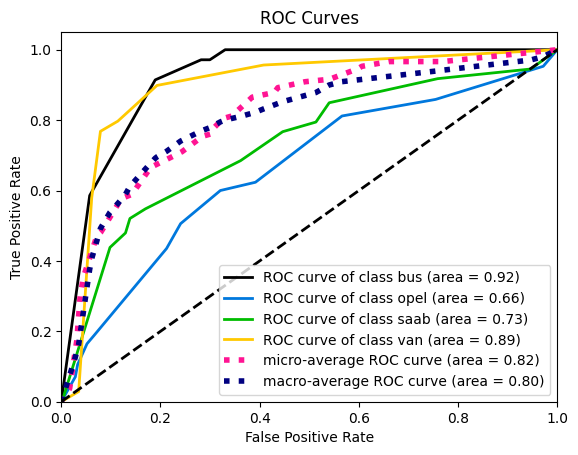

In [62]:
dec_tree_gs = DecisionTreeClassifier(max_depth=4)

dec_tree_gs.fit(X_train_PCA2, y_train)
y_pred_plot = dec_tree_gs.predict_proba(X_test_PCA2)
y_pred = dec_tree_gs.predict(X_test_PCA2)

print('f1_score', f1(y_test, y_pred))
print('accuracy', accuracy(y_test, y_pred))
roc_curve(y_test, y_pred_plot)

In [63]:
dec_tree = DecisionTreeClassifier()
searcher_2_5 = GridSearchCV(pipe_2_5, params_2_5)
searcher_2_5.fit(X_train_PCA2_std, y_train)
print(searcher_2_5.best_estimator_.get_params()['dec_tree'])

DecisionTreeClassifier(max_depth=7)


f1_score 0.5889702981857403
accuracy 0.5925925925925926


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

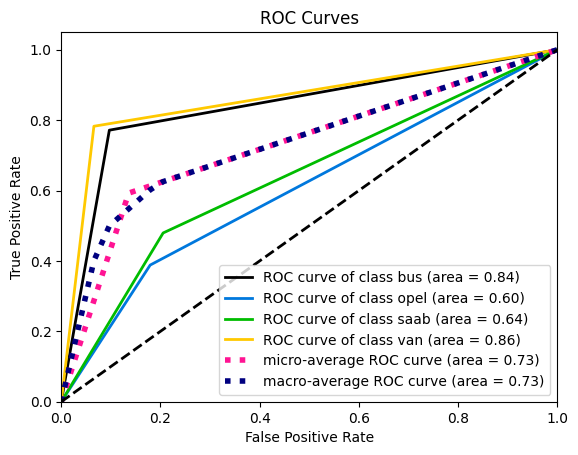

In [64]:
dec_tree_gs = DecisionTreeClassifier(max_depth=17)

dec_tree_gs.fit(X_train_PCA2_std, y_train)
y_pred_plot = dec_tree_gs.predict_proba(X_test_PCA2_std)
y_pred = dec_tree_gs.predict(X_test_PCA2_std)

print('f1_score', f1(y_test, y_pred))
print('accuracy', accuracy(y_test, y_pred))
roc_curve(y_test, y_pred_plot)

In [65]:
dec_tree = DecisionTreeClassifier()
searcher_2_5 = GridSearchCV(pipe_2_5, params_2_5)
searcher_2_5.fit(X_train_PCA2_mm, y_train)
print(searcher_2_5.best_estimator_.get_params()['dec_tree'])

DecisionTreeClassifier(max_depth=10)


f1_score 0.6247613098485957
accuracy 0.6195286195286195


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

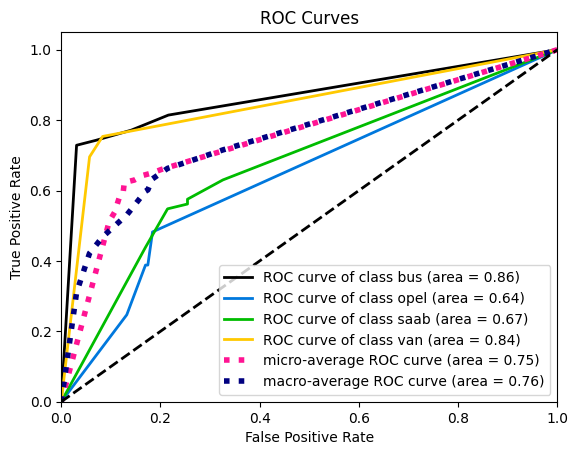

In [66]:
dec_tree_gs = DecisionTreeClassifier(max_depth=10)

dec_tree_gs.fit(X_train_PCA2_mm, y_train)
y_pred_plot = dec_tree_gs.predict_proba(X_test_PCA2_mm)
y_pred = dec_tree_gs.predict(X_test_PCA2_mm)

print('f1_score', f1(y_test, y_pred))
print('accuracy', accuracy(y_test, y_pred))
roc_curve(y_test, y_pred_plot)

In [67]:
dec_tree = DecisionTreeClassifier()
dec_tree = DecisionTreeClassifier()
searcher_2_5 = GridSearchCV(pipe_2_5, params_2_5)
searcher_2_5.fit(X_train, y_train)
print(searcher_2_5.best_estimator_.get_params()['dec_tree'])

DecisionTreeClassifier(max_depth=19)


f1_score 0.6663035712100905
accuracy 0.67003367003367


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

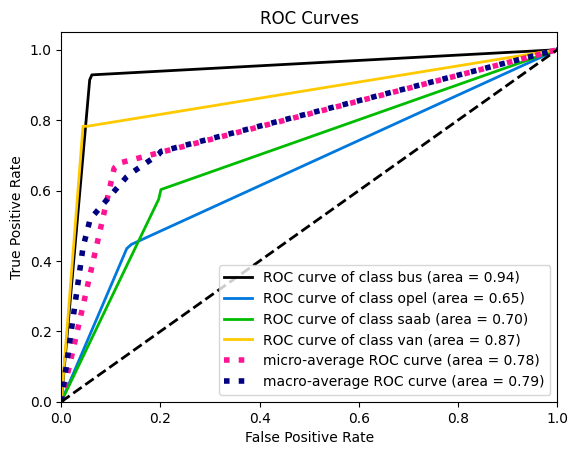

In [68]:
dec_tree_gs = DecisionTreeClassifier(max_depth=12)

dec_tree_gs.fit(X_train, y_train)
y_pred_plot = dec_tree_gs.predict_proba(X_test)
y_pred = dec_tree_gs.predict(X_test)

print('f1_score', f1(y_test, y_pred))
print('accuracy', accuracy(y_test, y_pred))
roc_curve(y_test, y_pred_plot)

In [69]:
dec_tree = DecisionTreeClassifier()
searcher_2_5 = GridSearchCV(pipe_2_5, params_2_5)
searcher_2_5.fit(X_train_scaled_standart, y_train)
print(searcher_2_5.best_estimator_.get_params()['dec_tree'])

DecisionTreeClassifier(max_depth=5)


f1_score 0.6753296914115038
accuracy 0.6767676767676768


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

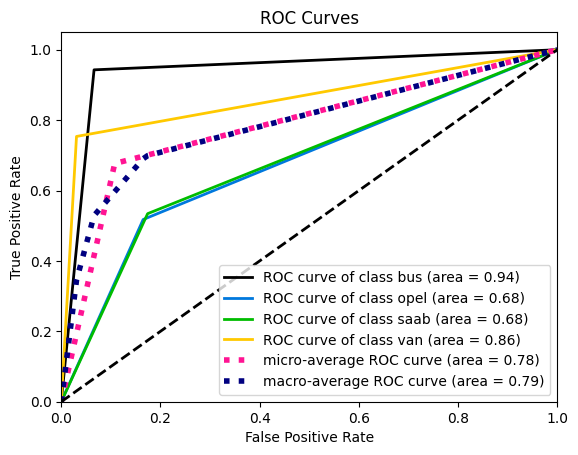

In [70]:
dec_tree_gs = DecisionTreeClassifier(max_depth=15)

dec_tree_gs.fit(X_train_scaled_standart, y_train)
y_pred_plot = dec_tree_gs.predict_proba(X_test_scaled_standart)
y_pred = dec_tree_gs.predict(X_test_scaled_standart)

print('f1_score', f1(y_test, y_pred))
print('accuracy', accuracy(y_test, y_pred))
roc_curve(y_test, y_pred_plot)

In [71]:
dec_tree = DecisionTreeClassifier()
searcher_2_5 = GridSearchCV(pipe_2_5, params_2_5)
searcher_2_5.fit(X_train_scaled_minmax, y_train)
print(searcher_2_5.best_estimator_.get_params()['dec_tree'])

DecisionTreeClassifier(max_depth=5)


f1_score 0.6573705694866543
accuracy 0.6531986531986532


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

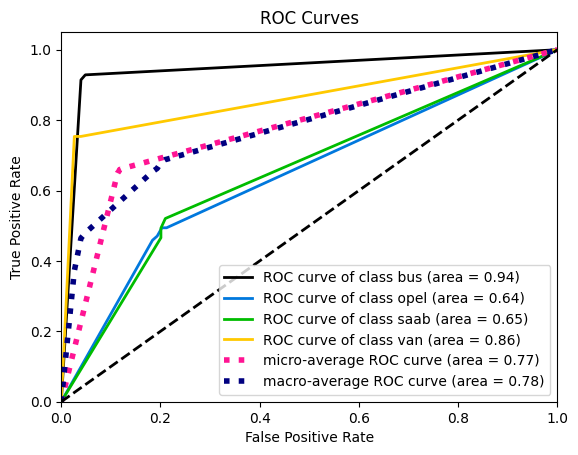

In [73]:
dec_tree_gs = DecisionTreeClassifier(max_depth=11)

dec_tree_gs.fit(X_train_scaled_minmax, y_train)
y_pred_plot = dec_tree_gs.predict_proba(X_test_scaled_minmax)
y_pred = dec_tree_gs.predict(X_test_scaled_minmax)

print('f1_score', f1(y_test, y_pred))
print('accuracy', accuracy(y_test, y_pred))
roc_curve(y_test, y_pred_plot)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

Выходные данные были обрезаны до нескольких последних строк (5000).
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

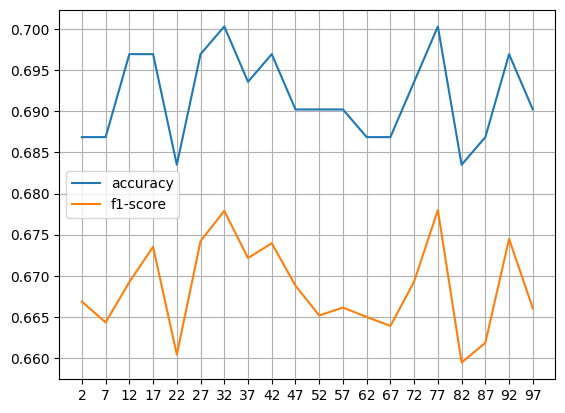

In [75]:
# YOUR CODE HERE
from sklearn import ensemble
n = [i for i in range(2,101,5)]
f1s = []
accs = []

for i in n:
    clsf = ensemble.BaggingClassifier(estimator=linear_model.LogisticRegression(), n_estimators=i, bootstrap=True)
    clsf.fit(X_train, y_train)
    y_pred_plot = clsf.predict_proba(X_test)
    y_pred = clsf.predict(X_test)
    f1s.append(f1(y_test, y_pred))
    accs.append(accuracy(y_test, y_pred))

plt.plot(n, accs, label = "accuracy")
plt.plot(n, f1s, label = "f1-score")
plt.xticks([i for i in range(2,101,5)])
plt.legend()
plt.grid()
plt.show()

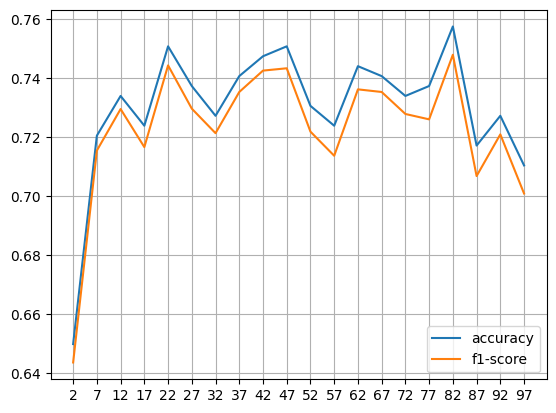

In [76]:
n = [i for i in range(2,101,5)]
f1s = []
accs = []

for i in n:
    clsf = ensemble.BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=i, bootstrap=True)
    clsf.fit(X_train, y_train)
    y_pred_plot = clsf.predict_proba(X_test)
    y_pred = clsf.predict(X_test)
    f1s.append(f1(y_test, y_pred))
    accs.append(accuracy(y_test, y_pred))

plt.plot(n, accs, label = "accuracy")
plt.plot(n, f1s, label = "f1-score")
plt.xticks([i for i in range(2,101,5)])
plt.legend()
plt.grid()
plt.show()

точность достигается при  17 для регрес 47

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

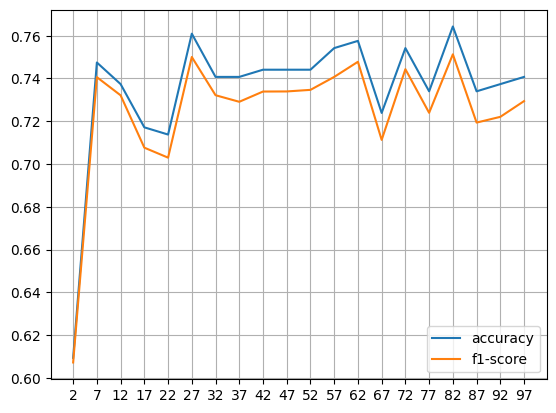

In [77]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

trees_numbers = [i for i in range(2,101,5)]
f1s = []
accs = []

for i in trees_numbers:
    tree = RandomForestClassifier(n_estimators=i)
    tree.fit(X_train, y_train)
    y_pred_plot = tree.predict_proba(X_test)
    y_pred = tree.predict(X_test)
    f1s.append(f1(y_test, y_pred))
    accs.append(accuracy(y_test, y_pred))

plt.plot(trees_numbers, accs, label = "accuracy")
plt.plot(trees_numbers, f1s, label = "f1-score")
plt.xticks([i for i in range(2,101,5)])
plt.legend()
plt.grid()
plt.show()

точность для деревва 42

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

In [78]:
# YOUR CODE HERE
sizes = [i for i in range(0,550,55)]
sizes.remove(0)
sizes

[55, 110, 165, 220, 275, 330, 385, 440, 495]

In [79]:
X_train[:110].shape

(110, 19)

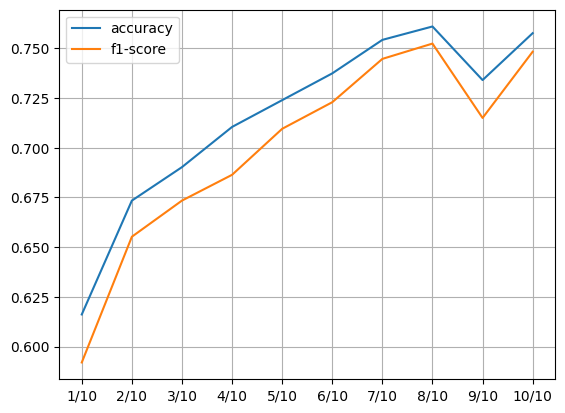

In [80]:
f1s = []
accs = []

for i in sizes:
    cls = RandomForestClassifier(n_estimators=17)
    tree.fit(X_train[:i], y_train[:i])
    y_pred_plot = tree.predict_proba(X_test)
    y_pred = tree.predict(X_test)
    f1s.append(f1(y_test, y_pred))
    accs.append(accuracy(y_test, y_pred))
cls = RandomForestClassifier(n_estimators=42)
tree.fit(X_train, y_train)
y_pred_plot = tree.predict_proba(X_test)
y_pred = tree.predict(X_test)
f1s.append(f1(y_test, y_pred))
accs.append(accuracy(y_test, y_pred))

sizes_numbers = [str(i) + '/10' for i in range(1,11)]
plt.plot(sizes_numbers, accs, label = "accuracy")
plt.plot(sizes_numbers, f1s, label = "f1-score")
plt.xticks(sizes_numbers)
plt.legend()
plt.grid()
plt.show()

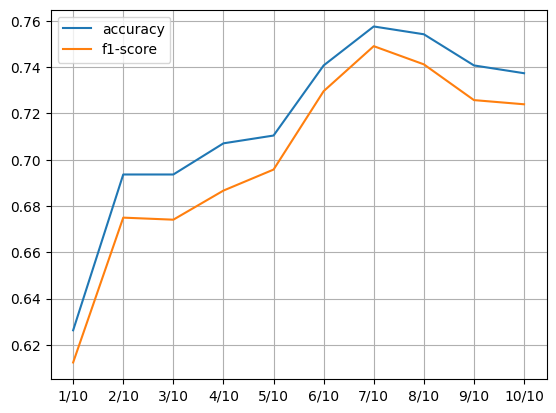

In [81]:

f1s = []
accs = []

for i in sizes:
    cls = DecisionTreeClassifier(max_depth=5)
    tree.fit(X_train[:i], y_train[:i])
    y_pred_plot = tree.predict_proba(X_test)
    y_pred = tree.predict(X_test)
    f1s.append(f1(y_test, y_pred))
    accs.append(accuracy(y_test, y_pred))
cls = RandomForestClassifier(n_estimators=42)
tree.fit(X_train, y_train)
y_pred_plot = tree.predict_proba(X_test)
y_pred = tree.predict(X_test)
f1s.append(f1(y_test, y_pred))
accs.append(accuracy(y_test, y_pred))


plt.plot(sizes_numbers, accs, label = "accuracy")
plt.plot(sizes_numbers, f1s, label = "f1-score")
plt.xticks(sizes_numbers)
plt.legend()
plt.grid()
plt.show()

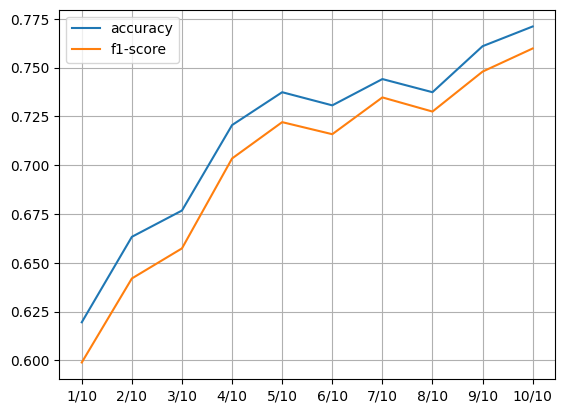

In [82]:
f1s = []
accs = []

for i in sizes:
    cls = linear_model.LogisticRegressionCV(cv=14,penalty='l2',
                                                    multi_class='multinomial', solver='saga', tol=1e-3,max_iter=500)
    tree.fit(X_train[:i], y_train[:i])
    y_pred_plot = tree.predict_proba(X_test)
    y_pred = tree.predict(X_test)
    f1s.append(f1(y_test, y_pred))
    accs.append(accuracy(y_test, y_pred))
cls = RandomForestClassifier(n_estimators=42)
tree.fit(X_train, y_train)
y_pred_plot = tree.predict_proba(X_test)
y_pred = tree.predict(X_test)
f1s.append(f1(y_test, y_pred))
accs.append(accuracy(y_test, y_pred))


plt.plot(sizes_numbers, accs, label = "accuracy")
plt.plot(sizes_numbers, f1s, label = "f1-score")
plt.xticks(sizes_numbers)
plt.legend()
plt.grid()
plt.show()

точность 8-10 для регрессии 7-11 тут влияет размер датасета еоо нужно регулировать для получения необходимых результатов, но не забывать про избыточность.